<font size="5">Labor Supply problem</font>


The entire exercise concerns itself with the labor supply problem, in where a consumer has to choose between the labor supplied (and thereby how much leisure is to be enjoyed) and the consumption derived from that labor. The exercise extends itself to concern tax revenue collected, and the implications a change in tax will give. At the end, optimal levels of taxation is considered.

<font size="5">Assignment 1</font>

In the first assignment I will construct an equation that solves the maximization problem the consumer faces when chooisng between labor, leisure and consumption. I set the parameters according to the values given in question 1.2 to find the optimal labor and consumption derived from the optimization and the utility from the chosen labor and consumption levels.

In [1]:
# Assignment 1

# Importing relevant packages
import numpy as np

# Choosing parametervalues
m = 1
v = 10
eps = 0.3
t0 = 0.4
t1 = 0.1
k = 0.4
w = 1
T = 10000

# Defining the utility functon with the given restrictions on c and l
def lab_sup(l, m, v, eps, t0, t1, k):
    c = m + w*l - (t0*w*l + t1*np.fmax(w*l - k, 0))
    if 0<=l<=1:
        utility = np.log(c)-(v*(l**(1+(1/eps)))/(1+(1/eps)))
    else:
        utility = -np.inf
    return utility

# Importing optimization tool
from scipy import optimize

# Making lab_sup a function of only l 
obj = lambda l: -lab_sup(l, m, v, eps, t0, t1,  k)

# Calling minimizer
solution = optimize.minimize(obj, 0.5)

# Getting the results
l = solution.x
c = m + w*l - (t0*w*l + t1*np.fmax(w*l - k, 0))
u = lab_sup(l, c, v, eps, t0, t1, k)

# Printing results
print('The optimal labor is',':',l)
print('The optimal consumption is',':',c)
print('The optimal utility is',':',u)

The optimal labor is : [0.39999999]
The optimal consumption is : [1.23999999]
The optimal utility is : [0.34851383]


The above results is the chosen level of labor and consumption and the utility they give the consumer, given the parameters.

<font size="5">Assigment 2</font>

In the second assignment I will try to plot optimal labor an consumption as functions of w, the wage rate, i order to illustrate the result graphically.

<function matplotlib.pyplot.show(*args, **kw)>

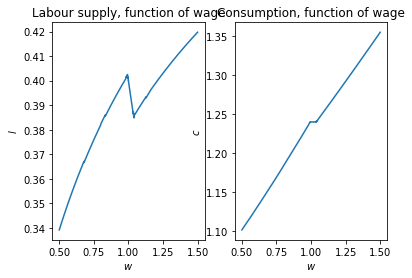

In [2]:
# Assignment 2

# Importing relevant packages
import matplotlib.pyplot as plt
%matplotlib inline

# Defining consumption as functoin of l and w 
c_func = lambda l, w: m + w*l - (t0*w*l + t1 * max([w*l - k,0]))

# Setting up w, l, c and N
N = 10000

w_vec = np.linspace(0.5,1.5,N)
l_vec = np.empty(N)
c_vec = np.empty(N)

# Defining the vector for w
for i,w in enumerate(w_vec):
    int_g = 0.5
    obj_2 = optimize.minimize(
        lambda l: -lab_sup(l, m, v, eps, t0, t1, k), int_g, method='SLSQP',bounds=((0,1),))
    l_vec[i] = obj_2.x
    c_vec[i] = c_func(l_vec[i],w)
 
# Making the plots of consumption and labor
fig = plt.figure()

# Labor graph
ax_l = fig.add_subplot(1, 2, 1)
ax_l.plot(w_vec,l_vec)
ax_l.set_title('Labour supply, function of wage')
ax_l.set_xlabel('$w$')
ax_l.set_ylabel('$l$')

# Consumption graph
ax_c = fig.add_subplot(1, 2, 2)
ax_c.plot(w_vec, c_vec)
ax_c.set_title('Consumption, function of wage')
ax_c.set_xlabel('$w$')
ax_c.set_ylabel('$c$')

plt.show

From the illustrations above it can be seen that both graphs have a kink around w = 1, which is where the optimimum is found for both labor and consumption.

<font size="5">Assigment 3</font>

Assignment 3 concerns itself with finding the overall tax revenue given the optimal levels of labor and consumption. It is found below

In [3]:
# Assignment 3

# Defining the tax revenue function
def tax(w_vec, l_vec, t0, t1, k):
    tax_rev = np.sum(t0*w_vec*l_vec + t1*np.max(w_vec*l_vec - k, 0))
    return tax_rev

# Printing the result
print('Total tax revenue is',':',tax(w_vec, l_vec, t0, t1, k))

Total tax revenue is : 1806.4887612453426


The total tax revenue is 1806,5 under optimal levels of consumption and labor and the parameters set at the beginning.

<font size="5">Assigment 4</font>

In the fourth assignment we change the Frisch elasticity of labor supply, making work hours less responsive to changes in wage.

In [4]:
# Assignment 4

# Giving epsilon new value
eps = 0.1

# Setting up new c, l and w
c_v = np.empty(N)
l_v = np.empty(N)
w_v = np.linspace(0.5,1.5,N)

# Making new wagerate function
for i, w in enumerate(w_v):
    int_g = 0.5
    obj_3 = optimize.minimize(lambda l: -lab_sup(l, m, v, eps, t0, t1, k), int_g, method = 'SLSQP', bounds=((0,1),))
    
    # Getting the results
    l_v[i] = obj_3.x
    c_v[i] = c_func(l_v[i], w)

# Defining the new tax revenue function   
def new_tax_eps(w_vec, l_v, t0, t1, k):
    new_tax_rev_eps = np.sum(t0*w_vec*l_v + t1*np.max(w_vec*l_v - k, 0))
    return new_tax_rev_eps

# Printing the result
print('New tax reveneue with eps = 0.1', ':', new_tax_eps(w_vec, l_v, t0, t1, k))    

New tax reveneue with eps = 0.1 : 3580.566225159515


With a change in the Frisch elasticity of labor supply the tax revenue now increases to 3580.57.

<font size="5">Assigment 5</font>

In the fifth assignment I will try to find the optimal levels of standard and top levels brackets of income and the cut-off top income labor bracket, as well as the totail tax revenue under these circumstances.

In [38]:
# Assignment 5

# Redefining the consumption function
def new_c(x):
    t0 = x[2]
    t1 = x[3]
    k = x[4]
    return m + x[0]*x[1] - (x[2]*x[0]*x[1] + x[3] * np.max([x[0]*x[1] - x[4],0]))

# Defining the tax function
def new_tax_opt(x):
    w = x[0]
    l = x[1]    
    t0 = x[2]
    t1 = x[3]
    k = x[4]
    new_tax_rev_opt = np.sum(x[2]*x[0]*x[1] + x[3]*np.max(x[0]*x[1]-x[4],0))
    return -new_tax_rev_opt

def opt_tax(x):
    w = x[0]
    l = x[1]
    constr = new_c(x)
    return -new_tax_opt(x)

# Setting up conditions for optimization
x0 = [1, 0.4, 0.4, 0, 0]
constraints = ({"type":"ineq","fun":new_c})

# Calling the minimizer
new_obj = optimize.minimize(new_tax_opt, x0, bounds=((0.5,1.5),(0,1),(0,1),(0,1),(0,1)),constraints=constraints, method='SLSQP')

# Getting the results
w_opt = new_obj.x[0]
l_opt = new_obj.x[1]
t0_opt = new_obj.x[2]
t1_opt = new_obj.x[3]
k_opt = new_obj.x[4]
c_opt = new_c(new_obj.x)
tax_revenue_opt = tax(w_vec,l_vec,t0_opt,t1_opt,k_opt)

# Printing results
print("Optimal standard labor income tax is", t0_opt)
print("Optimal top bracket labor income tax is", t1_opt)
print("Optimal cut-off for top labor income bracket tax is", k_opt)
print("Optimal tax revenue is", tax_revenue_opt)

Optimal standard labor income tax is 0.8744056377848538
Optimal top bracket labor income tax is 0.8397338047597173
Optimal cut-off for top labor income bracket tax is 0.08479968700254421
Optimal tax revenue is 8021.676467647748
